## Huấn luyện mô hình định giá xe dựa trên thời gian chạy và số nghìn km 

Epoch 0, Loss: 1.0289
Epoch 50, Loss: 0.0079
Epoch 100, Loss: 0.0084
Epoch 150, Loss: 0.0075
Epoch 200, Loss: 0.0071
Epoch 250, Loss: 0.0062
Epoch 300, Loss: 0.0077
Epoch 350, Loss: 0.0077
Epoch 400, Loss: 0.0080
Epoch 450, Loss: 0.0075
Dự đoán giá xe (VND): [4.8260045e+08 3.9126173e+08]


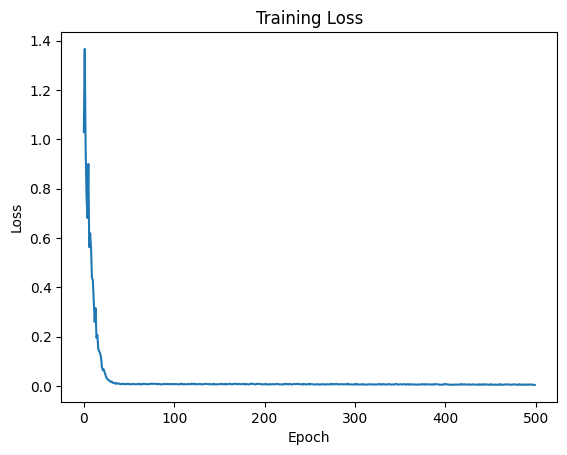

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Dữ liệu đầu vào (tuổi xe, số nghìn km) và giá xe (VND)
X = np.array([[1, 16.09], [3, 80.47], [5, 128.75], [7, 177.03], [10, 241.40]], dtype=np.float32)  # Đã chuyển sang nghìn km
y = np.array([[20000], [15000], [12000], [9000], [5000]], dtype=np.float32) * 25000  # Chuyển từ USD sang VND

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Dùng DataLoader cho mini-batch training
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Xây dựng mô hình mạng nơ-ron
class CarPriceModel(nn.Module):
    def __init__(self):
        super(CarPriceModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

# Khởi tạo mô hình
model = CarPriceModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Huấn luyện mô hình
losses = []
for epoch in range(500):
    epoch_loss = 0
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    losses.append(epoch_loss / len(dataloader))

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss / len(dataloader):.4f}')

# Dự đoán thử nghiệm (tuổi xe, số nghìn km)
test_data = np.array([[3, 2.05], [10, 16.09]], dtype=np.float32)  # Dữ liệu theo nghìn km
test_data = scaler_X.transform(test_data)  # Chuẩn hóa dữ liệu đầu vào
test_tensor = torch.tensor(test_data, dtype=torch.float32)
predicted_prices = model(test_tensor).detach().numpy()
predicted_prices = scaler_y.inverse_transform(predicted_prices)  # Chuyển về đơn vị gốc (VND)
print(f"Dự đoán giá xe (VND): {predicted_prices.flatten()}")

# Vẽ đồ thị loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()